In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('Train.csv')

In [18]:
data

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
...,...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149,-80.110012
1596,-0.076099,0.255257,0.290054,1.796036,0.340350,118.315601
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520,-107.510508
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334,-47.341558


In [19]:
data = data.values

In [21]:
data.shape

(1600, 6)

In [24]:
X = data[:,:5]
Y = data[:,5]

In [25]:
print(X.shape)
print(Y.shape)

(1600, 5)
(1600,)


In [27]:
Y = Y.reshape(-1,1)
print(Y.shape)

(1600, 1)


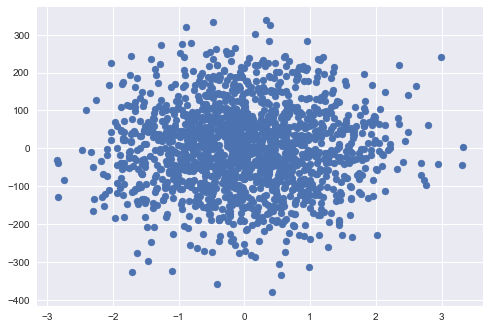

In [33]:
plt.style.use("seaborn")
plt.scatter(X[:,4],Y)  
plt.show()

In [34]:
# appending a column of ones to X matrix
ones = np.ones((X.shape[0],1))
X_ = np.hstack((X,ones))   # generating new matrix by stacking X and ones together
print(X_.shape)
print(X_[:5,:])   # printing first five rows

(1600, 6)
[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183  1.        ]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685  1.        ]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416  1.        ]
 [ 0.17531181  0.14319424 -0.58111096 -0.12210693 -1.29216807  1.        ]
 [-1.69301097  0.54271187 -2.79872942 -0.68672304  1.24407683  1.        ]]


In [44]:
def predict(X,theta):     # dot product of X and theta
    return np.dot(X,theta)

def getThetaClosedForm(X,Y):
    Y = np.mat(Y)      # converting Y to a matrix, earlier Y was a vector
    firstPart = np.dot(X.T,X)
    secondPart = np.dot(X.T,Y)
    # to compute inverse, we are using psuedo inverse method
    theta = np.linalg.pinv(firstPart)*secondPart
    return theta

In [56]:
theta = getThetaClosedForm(X_,Y)
print(type(theta))
print(theta)

<class 'numpy.matrix'>
[[29.68187118]
 [92.66247759]
 [ 8.28062089]
 [44.76773522]
 [ 2.51916121]
 [ 4.99096674]]


In [51]:
predictions = predict(X_,theta)

In [53]:
print(type(predictions))
print(predictions)

<class 'numpy.matrix'>
[[ -57.87196311]
 [ -89.46019557]
 [  53.95305942]
 ...
 [-115.65802541]
 [ -64.27649688]
 [-116.11442895]]


### Calculating for X_test

In [60]:
X_test = pd.read_csv('Test.csv').values

In [61]:
X_test.shape

(400, 5)

In [62]:
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((X_test,ones))   
print(X_test.shape)
print(X_test[:5,:])

(400, 6)
[[ 1.01525387  2.07620944 -0.26643482 -2.4180882  -0.98050279  1.        ]
 [-0.3750212   0.95318453  0.62671914  0.70440575 -0.35548921  1.        ]
 [-1.02445225  0.96299111 -0.407942   -1.86127383  0.45520135  1.        ]
 [-2.4898408   0.54480173  0.6012189  -0.60702147 -1.31428633  1.        ]
 [-0.38467471 -0.83362421  1.35855215 -0.54793205  0.41192542  1.        ]]


In [63]:
predictions = predict(X_test,theta)

In [65]:
df = pd.DataFrame(predictions, columns=['target'])

In [66]:
df

,target
0,114.583689
1,118.012815
2,-21.739852
3,-43.936899
4,-95.914898
...,...
395,-81.989000
396,-186.032535
397,125.292336
398,65.369841


In [67]:
df.to_csv('Outcome.csv')